In [1]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from math import pi

In [2]:
def stater(qc):
    backend_sim = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend_sim).result()
    state = result.get_statevector(qc)
    print(state)

In [3]:
# create a circuit with two qubits
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
qc = QuantumCircuit(a,b)

In [4]:
print(0)
stater(qc)
# insert a x gate on qubit a
## qubit a is guaranteed to be 1
qc.x(a)
print(1)
stater(qc)
# insert a z gate on qubit b
## qubit b is guaranteed to be 0
qc.z(b)
print(2)
stater(qc)

0
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
1
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
2
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


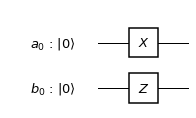

In [6]:
qc.draw(output='mpl')
# the two qubits never intersect so they are product states

[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]]


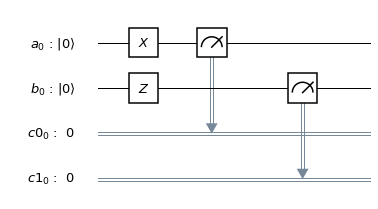

In [7]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))
c0 = ClassicalRegister(1, 'c0')
c1 = ClassicalRegister(1, 'c1')
meas = QuantumCircuit(a,b,c0,c1)
meas.draw(output='mpl')
meas.measure(a,c0)
meas.measure(b,c1)
circ = qc+meas
circ.draw(output='mpl')

In [8]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
## the final result will be definite
## qubit a will always be 1 and qubit b will always be 0
## because they are both product states and spin operators are used
## the result will always be a product state as well

{'0 1': 1024}


In [9]:
# create two circuits with one qubit each
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
qcA = QuantumCircuit(a)
qcB = QuantumCircuit(b)

In [10]:
print(0)
stater(qcA)
# insert a x gate on qubit a
## qubit a is guaranteed to be 1
qcA.x(a)
print(1)
stater(qcA)

0
[1.+0.j 0.+0.j]
1
[0.+0.j 1.+0.j]


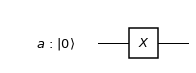

In [11]:
qcA.draw(output='mpl')
# this is a single qubit circuit

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


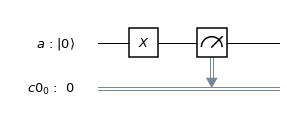

In [12]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qcA, backend)
result = job.result()
print(result.get_unitary(qcA, decimals=3))
c0 = ClassicalRegister(1, 'c0')
meas = QuantumCircuit(a,c0)
meas.draw(output='mpl')
meas.measure(a,c0)
circ = qcA+meas
circ.draw(output='mpl')

In [13]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
## the final result is the same as the final result of a two qubit system (1)
## when the two qubits are not entangled

{'1': 1024}


In [14]:
print(0)
stater(qcB)
# insert a z gate on qubit b
## qubit b is guaranteed to be 0
qcB.z(b)
print(1)
stater(qcB)

0
[1.+0.j 0.+0.j]
1
[1.+0.j 0.+0.j]


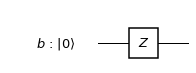

In [15]:
qcB.draw(output='mpl')
# this is a single qubit circuit

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


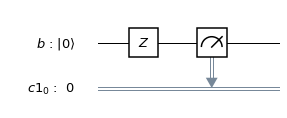

In [16]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qcB, backend)
result = job.result()
print(result.get_unitary(qcB, decimals=3))
c1 = ClassicalRegister(1, 'c1')
meas = QuantumCircuit(b,c1)
meas.draw(output='mpl')
meas.measure(b,c1)
circ = qcB+meas
circ.draw(output='mpl')

In [17]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
## the final result is the same as the final result of a two qubit system (0)
## when the two qubits are not entangled

{'0': 1024}
